---

# Part 1 - Pre-processing and exploratory analysis


In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
import datetime




In [3]:
basedir = ''


***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month



In [4]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [5]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


In [6]:

def drop_cols(df):
    cols=['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped', 'amenities',
          'neighborhood_overview', 'picture_url','host_url', 'host_about', 'host_location','host_total_listings_count',
          'host_thumbnail_url','host_picture_url','host_verifications','bathrooms_text','has_availability','minimum_minimum_nights',
          'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
          'number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
          'calculated_host_listings_count_shared_rooms']
    df=df.drop(columns=cols,axis=1)
    return df

In [7]:
df_drop=drop_cols(df)
df_drop.head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,NaN,NaN,100%,t,Indische Buurt,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1.95
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,NaN,NaN,100%,f,Grachtengordel,...,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2.58
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,within an hour,100%,57%,t,Grachtengordel,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,0.14
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,within an hour,100%,100%,t,Westelijke Eilanden,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,t,2.01
4,28871,Comfortable double room,124245,Edwin,2010-05-13,within an hour,100%,92%,t,Amsterdam Centrum,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,2.68


In [8]:
def drop_cols_na(df,threshold):
    na_rate=df.isna().sum().tolist()
    print(na_rate)
    cols=df.columns.tolist()
    length=len(df)
    #map(lambda col,na_rate: df.drop(columns=col,axis=1,inplace=True) if na_rate/length > threshold else None, cols,na_rate)
    for i in range(len(na_rate)):
        if na_rate[i]/length>=threshold:
            df.drop(columns=cols[i],axis=1,inplace=True)
    return df

In [9]:
df_drop_na=drop_cols_na(df_drop,0.5)
df_drop_na.head()

[0, 33, 0, 55, 55, 14273, 14273, 9255, 55, 6203, 55, 55, 55, 0, 18522, 0, 0, 0, 0, 0, 18522, 1014, 107, 0, 0, 0, 18522, 0, 0, 0, 0, 0, 0, 2375, 2375, 2620, 2630, 2630, 2638, 2631, 2636, 2636, 18522, 0, 2375]


,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,t,Indische Buurt,1.0,t,...,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1.95
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,f,Grachtengordel,2.0,t,...,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2.58
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,t,Grachtengordel,2.0,t,...,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0.14
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,t,Westelijke Eilanden,1.0,t,...,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2.01
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,t,Amsterdam Centrum,2.0,t,...,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.68


In [10]:
def binary_encoding(df):
    cols=['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']
    for i in cols:
        df[i]=np.where(df[i]=='t',1,0)
    return df

In [11]:
df_drop_na_num=binary_encoding(df_drop_na)

In [12]:
# hint: check Pandas to_datetime method
def add_host_days(df):
    df['host_since']=pd.to_datetime(df['host_since'])
    df['host_days']=(datetime.datetime.now()-df['host_since']).dt.days
    return df

In [13]:
df_drop_na_num_days=add_host_days(df_drop_na_num)

In [14]:
def convert_price(df):
    df['price']=df['price'].map(lambda x:x[1:]).str.replace(',','').astype(float)
    return df

In [15]:
df_drop_na_num_days_price=convert_price(df_drop_na_num_days)

In [16]:
df_drop_na_num_days_price['price'].head()

0     59.0
1    236.0
2    125.0
3    135.0
4     75.0
Name: price, dtype: float64


```python
# What is the total number of rows in the dataframe?
df.shape[0]
```



In [17]:
# How many hosts offer 2 or more properties for rent?
df_drop_na_num_days_price[df['host_listings_count']>1].shape[0]
# 4172

4172

In [18]:
# What is the highest price for a listing?
df_drop_na_num_days_price['price'].max()

8000.0

In [19]:
# What is the ID of the listing that has the largest number of bedrooms?
np.where(df_drop_na_num_days_price['bedrooms']>=max(df_drop_na_num_days_price['bedrooms']))

(array([18352], dtype=int64),)

In [20]:
# What is the ID of the listing with the largest advertised price
np.where(df_drop_na_num_days_price['price']>=max(df_drop_na_num_days_price['price']))

(array([   88, 10972], dtype=int64),)

In [21]:
# There are different room types. How many listings are there for the most common room type?
df_drop_na_num_days_price.groupby('room_type',sort=True)['id'].count()

room_type
Entire home/apt    14433
Hotel room           141
Private room        3896
Shared room           52
Name: id, dtype: int64

In [22]:
# How many hosts are there that have been registered for more than 3000 days?
df_drop_na_num_days_price[df_drop_na_num_days_price['host_days']>3000].shape[0]

2790

## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood:

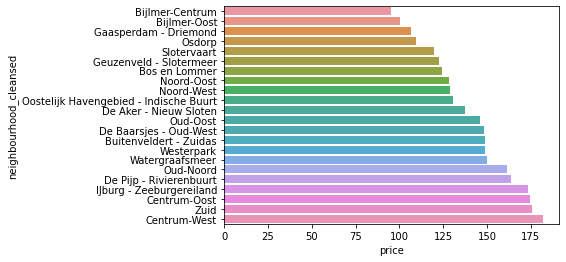

In [23]:

data=df_drop_na_num_days_price[['neighbourhood_cleansed','price']]
dp1=data.groupby('neighbourhood_cleansed').mean().sort_values(by='price')
sns.barplot(y=dp1.index,x='price',data=dp1)

Plot a correlation matrix as instructed in the Coursework proforma:

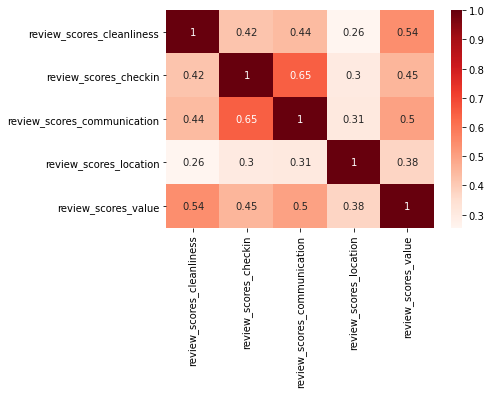

In [24]:

data=df_drop_na_num_days_price[['review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
dp2=data.corr(method='pearson')
sns.heatmap(dp2,cmap="Reds",annot=True)

Plot a geographical distribution as instructed in the Coursework proforma:

In [25]:
df_drop_na_num_days_price['price'].dtype

dtype('float64')

<ipython-input-26-1f3c9b93acf8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expensive['category']=pd.cut(expensive['price'],bins=listBins,labels=listLabels,


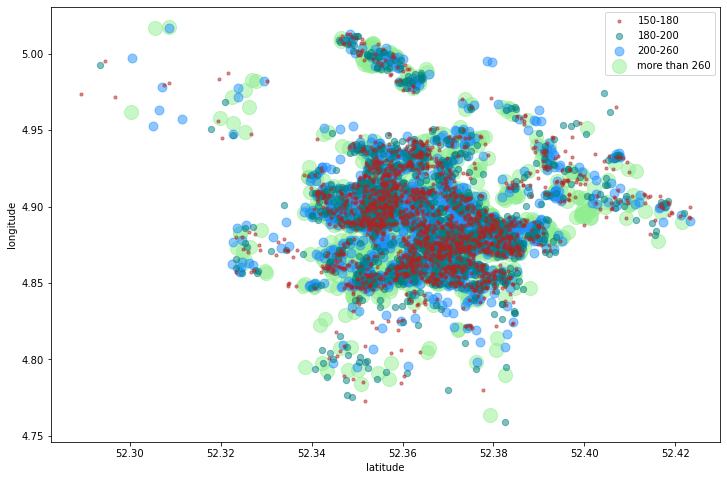

In [26]:

expensive=df_drop_na_num_days_price[df_drop_na_num_days_price['price']>150] #get rid of the listings have less price than 150
listLabels=['150-180','180-200','200-260','more than 260'] #set different category 
listBins=[150,180,200,260,10000]

expensive['category']=pd.cut(expensive['price'],bins=listBins,labels=listLabels,
                             include_lowest=True)

prices_types=['150','179','202','260','500']
colors={'150-180':'firebrick','180-200':'teal','200-260':'dodgerblue','more than 260':'lightgreen'}
sizes={'150-180':10,'180-200':40,'200-260':80,'more than 260':200}
alpha={'150-180':0.3,'180-200':0.5,'200-260':0.6,'more than 260':0.8}

%matplotlib inline
x=expensive.latitude
y=expensive.longitude

plt.rcParams['figure.figsize'] = [12, 8]
fig, ax = plt.pyplot.subplots()
grouped=expensive.groupby('category')
zorder_tier=20
for key,group in grouped:
    group.plot(ax=ax,kind='scatter',x='latitude',y='longitude',
               s=sizes[key],color=colors[key],label=key,
               alpha=0.5,zorder=zorder_tier)
    zorder_tier=zorder_tier-5

plt.pyplot.show()

---





## Question 2a: Linear regression and t-tests


In [27]:
# your linear regression code...
data=df_drop_na_num_days_price[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','review_scores_rating']]
data=data.dropna(axis=0,how='any')
x = data[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
y = data['review_scores_rating']
x.shape
y.shape

(15880,)

In [28]:
x = sm.add_constant(x,prepend=False)
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.726
Model:                              OLS   Adj. R-squared:                  0.726
Method:                   Least Squares   F-statistic:                     7008.
Date:                  Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                          00:59:07   Log-Likelihood:                -42957.
No. Observations:                 15880   AIC:                         8.593e+04
Df Residuals:                     15873   BIC:                         8.598e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences):  There are significantly different in terms of nightly price in Entire home/apt and Private room,Entire home/apt and Shared room,Hotel room and Private room.

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences):NO

In [29]:

data=df_drop_na_num_days_price[['room_type','price']]
t_data_1=data[data['room_type']=='Entire home/apt']
t_data_2=data[data['room_type']=='Hotel room']
t_data_3=data[data['room_type']=='Private room']
t_data_4=data[data['room_type']=='Shared room']
ttest_ind(t_data_1['price'],t_data_2['price'],equal_var=False)

Ttest_indResult(statistic=2.6069639952778854, pvalue=0.0101094435252948)

In [30]:
ttest_ind(t_data_1['price'],t_data_3['price'],equal_var=False)

Ttest_indResult(statistic=35.86280862828723, pvalue=7.176168041890004e-263)

In [31]:
ttest_ind(t_data_1['price'],t_data_4['price'],equal_var=False)

Ttest_indResult(statistic=4.057551563978068, pvalue=0.0001682212990396483)

In [32]:
ttest_ind(t_data_2['price'],t_data_3['price'],equal_var=False)

Ttest_indResult(statistic=2.5408444462719757, pvalue=0.012119588446911016)

In [33]:
ttest_ind(t_data_2['price'],t_data_4['price'],equal_var=False)

Ttest_indResult(statistic=1.219264394039532, pvalue=0.22482136880704187)

In [34]:
ttest_ind(t_data_3['price'],t_data_4['price'],equal_var=False)

Ttest_indResult(statistic=-0.6956014943986626, pvalue=0.4897658941925044)

In [35]:
# your code...
def variable_selection(df,predictors,target,alpha):
    preds=[]
    rem_pred=[]
    rsadj_max=0
    for col in predictors:
        fml="{}~{}+1".format(target,col)
        mod=smf.ols(formula=fml,data=df)
        res=mod.fit()
        #print(++i)
        if res.pvalues[col]<=alpha:
            rem_pred.append((res.rsquared_adj,col))
            print("Remaining column name:"+col)
        else:
            predictors.remove(col)
            print("Removed column name:"+col)
    while rem_pred:
        rem_pred=[]
        for col in predictors:
            #print(++i)
            fml="{}~{}+1".format(target,'+'.join(preds+[col]))
            mod=smf.ols(formula=fml,data=df)
            res=mod.fit()
            rem_pred.append((res.rsquared_adj,col))
        rem_pred.sort()
        (rsadj,col)=rem_pred.pop()
        if rsadj_max<rsadj:
            predictors.remove(col)
            preds.append(col)
        else:
            rem_pred=[]
    return preds

In [36]:
data_vs=df_drop_na_num_days_price.select_dtypes(exclude='object')
data_vs=data_vs.select_dtypes(exclude='datetime')
data_vs=data_vs.join(pd.get_dummies(df_drop_na_num_days_price['room_type'],dtype=float))
data_vs.dropna(axis=0,how="any")

,id,host_id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days,Entire home/apt,Hotel room,Private room,Shared room
0,2818,3159,1,1.0,1,1,52.36575,4.94142,2,1.0,...,10.0,9.0,10.0,1,1.95,4635.0,0.0,0.0,1.0,0.0
1,20168,59484,0,2.0,1,1,52.36509,4.89354,2,1.0,...,10.0,10.0,9.0,1,2.58,4201.0,0.0,0.0,1.0,0.0
2,25428,56142,1,2.0,1,0,52.37297,4.88339,3,1.0,...,10.0,10.0,10.0,0,0.14,4213.0,1.0,0.0,0.0,0.0
3,27886,97647,1,1.0,1,1,52.38761,4.89188,2,1.0,...,10.0,10.0,10.0,1,2.01,4090.0,0.0,0.0,1.0,0.0
4,28871,124245,1,2.0,1,1,52.36610,4.88953,2,1.0,...,10.0,10.0,10.0,0,2.68,4039.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18442,46522370,372878845,0,7.0,1,1,52.35915,4.89965,4,1.0,...,10.0,10.0,10.0,1,1.00,224.0,0.0,0.0,1.0,0.0
18445,46522591,372878845,0,7.0,1,1,52.35933,4.89904,2,1.0,...,10.0,10.0,10.0,1,1.00,224.0,0.0,0.0,1.0,0.0
18446,46522658,372878845,0,7.0,1,1,52.35901,4.89771,2,1.0,...,10.0,10.0,10.0,1,1.00,224.0,0.0,0.0,1.0,0.0
18450,46558182,327652332,0,8.0,1,1,52.37520,4.89242,4,2.0,...,10.0,10.0,10.0,1,1.00,505.0,1.0,0.0,0.0,0.0


In [37]:
data_vs=data_vs.rename(columns={'Entire home/apt':'entire_home',"Hotel room":"hotel_room","Private room":"private_room","Shared room":"shared_room"})
predictors=data_vs.columns.tolist()
target="price"
#data_vs.columns=predictors
predictors.remove(target)

In [38]:
col_vs=variable_selection(data_vs,predictors,target,0.05)
col_vs

Removed column name:id
Remaining column name:host_is_superhost
Remaining column name:host_listings_count
Removed column name:host_has_profile_pic
Removed column name:latitude
Remaining column name:accommodates
Remaining column name:bedrooms
Remaining column name:beds
Remaining column name:minimum_nights
Remaining column name:maximum_nights
Remaining column name:availability_30
Remaining column name:availability_60
Remaining column name:availability_90
Remaining column name:availability_365
Remaining column name:number_of_reviews
Remaining column name:number_of_reviews_ltm
Remaining column name:review_scores_rating
Removed column name:review_scores_accuracy
Removed column name:review_scores_checkin
Remaining column name:review_scores_location
Removed column name:review_scores_value
Remaining column name:reviews_per_month
Remaining column name:host_days
Remaining column name:entire_home
Removed column name:hotel_room
Remaining column name:shared_room


['accommodates',
 'review_scores_location',
 'private_room',
 'availability_365',
 'number_of_reviews_ltm',
 'bedrooms',
 'host_listings_count',
 'minimum_nights',
 'availability_30',
 'review_scores_communication',
 'review_scores_cleanliness',
 'shared_room',
 'host_is_superhost',
 'number_of_reviews',
 'maximum_nights',
 'availability_60',
 'longitude',
 'instant_bookable',
 'host_days',
 'entire_home',
 'host_identity_verified',
 'availability_90',
 'host_id',
 'reviews_per_month',
 'review_scores_rating',
 'beds']

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [39]:
def recommend_neighbourhood(df,budget_min,budget_max,relative):
    can_house = df[(df['price']>= budget_min) & (df['price']<=budget_max)]
    can_house = can_house.groupby(['neighbourhood_cleansed'])['id'].count()
    can_house = pd.DataFrame(can_house)

    if(relative):
        nei_count = df.groupby(['neighbourhood_cleansed'])['id'].count()
        nei_count = pd.DataFrame(nei_count)
        nei_count = nei_count.reset_index()
        nei_count = nei_count.rename(columns={'id':'id_count'})
        can_house = can_house.reset_index()
        can_house = can_house.rename(columns={'id':'budget_neighbourhood_count'})
        budget_nei_result = can_house.merge(nei_count,on=['neighbourhood_cleansed'],how='inner')
        budget_nei_result['relative_rate'] = budget_nei_result['budget_neighbourhood_count'] / budget_nei_result['neighbourhood_count']
        budget_nei_result = budget_nei_result.sort_values('relative_rate',ascending=False)
        budget_nei_result_list = budget_nei_result['neighbourhood_cleansed'].tolist()
        return budget_nei_result_list[0]
    else:
         recommend_result = can_house.sort_values('id',ascending=False)
         recommend_result_list = recommend_result.index.tolist()
         return recommend_result_list[0]
        

In [40]:
neighbourhood_result = recommend_neighbourhood(df_drop_na_num_days_price,200,5000,False)
print(neighbourhood_result)

De Baarsjes - Oud-West


### Price recommender for hosts

In [41]:

def recommend_price(df,latitude,longitude,n_neighbours,room_type):
    # 
    price_recommder = df[['id','price','latitude','longitude','room_type']]

    if(room_type == ''):
        Y = np.array([latitude,longitude])
        cal_values_list = []
        for index,rows in price_recommder.iterrows():
          X = np.array([float(rows['latitude']),float(rows['longitude'])])
          calute_value = np.sqrt(np.sum(np.square(X-Y)))
          cal_values_list.append(calute_value)
        price_recommder['cal_values']=pd.Series(cal_values_list)
        price_result_recommder = price_recommder.sort_values(by='cal_values')
        result_recommder = price_result_recommder.head(n_neighbours)
        return result_recommder['price'].mean()
    else:
        price_recommder = price_recommder[price_recommder['room_type']==room_type]
        Y = np.array([latitude,longitude])
        cal_values_list = []
        for index,rows in price_recommder.iterrows():
          X = np.array([float(rows['latitude']),float(rows['longitude'])])
          calute_value = np.sqrt(np.sum(np.square(X-Y)))
          cal_values_list.append(calute_value)
        price_recommder['cal_values']=pd.Series(cal_values_list)
        price_result_recommder = price_recommder.sort_values(by='cal_values')
        result_recommder = price_result_recommder.head(n_neighbours)
        return result_recommder['price'].mean()
    return price_recommender

In [42]:
price_recommder_val = recommend_price(df_drop_na_num_days_price,52.1,5.1,5,'')
print(price_recommder_val)

price_recommder_val = recommend_price(df_drop_na_num_days_price,52.1,5.1,5,'entire_home')
print(price_recommder_val)



117.6
nan


<ipython-input-41-9ab1134b2075>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_recommder['cal_values']=pd.Series(cal_values_list)
<ipython-input-41-9ab1134b2075>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  price_recommder['cal_values']=pd.Series(cal_values_list)
